<h1 style="color:blue; text-align:center">Week 9: Data Cleansing and Transformation</h1>

<sub>Mha Luqman - JSSN</sub>

<hr>

#### Data Overview

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.shape

(41188, 21)

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<hr>

# According to Week 8 there is outliers in duration, campaign.

####  1-Outlier detection and removal using 3 standard deviation


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

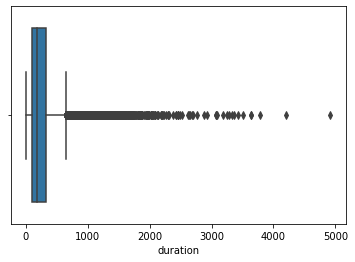

In [9]:
sns.boxplot('duration' , hue = 'y' , data =df)

In [10]:
upper_limit = df.duration.mean() + 3*df.duration.std()
upper_limit

1036.1227567065391

In [11]:
lower_limit = df.duration.mean() -3*df.duration.std()
lower_limit

-519.5527363122494

#### Here are the outliers that are beyond 3 std dev from mean



In [12]:
df[(df.duration>upper_limit) | (df.duration<lower_limit)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
164,39,services,divorced,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40880,28,admin.,single,high.school,no,no,no,cellular,oct,wed,...,2,999,0,nonexistent,-1.1,94.601,-49.5,0.959,4963.6,yes
40970,24,admin.,single,university.degree,no,yes,no,cellular,oct,fri,...,3,3,2,success,-1.1,94.601,-49.5,0.993,4963.6,yes
41121,46,admin.,single,university.degree,no,yes,no,cellular,nov,tue,...,3,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41123,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes


#### Now remove these outliers and generate new dataframe

In [13]:
df_no_outlier_std_dev = df[(df.duration<upper_limit) & (df.duration>lower_limit)]
df_no_outlier_std_dev.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df_no_outlier_std_dev.shape

(40327, 21)

In [15]:
df.shape

(41188, 21)

In [16]:
df = df_no_outlier_std_dev
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<hr>

#### 2- Outlier detection and removal using Z Score

Z score indicates how many standard deviation away a data point is.



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

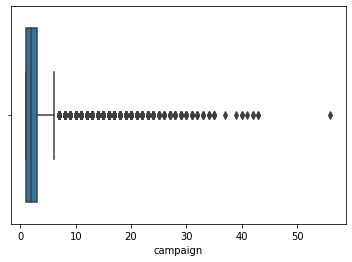

In [17]:
sns.boxplot('campaign' , hue = 'y' , data =df)

In [18]:
df.campaign.mean()

2.566568304113869

In [19]:
df.campaign.std()

2.7782314231341783

For example in our case mean is 2.567592502670681 and standard deviation is 2.7700135429023276.
#### Calculate the Z Score



<img src="zscore.png" width=200 height=200>

In [20]:
df['zscore'] = ( df.campaign - df.campaign.mean() ) / df.campaign.std()
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873


In [21]:
df['campaign'].head(1)

0    1
Name: campaign, dtype: int64

*Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away*

In [22]:
df[df['zscore']>3]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
2189,56,admin.,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.035540
2234,47,management,married,university.degree,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.395481
2554,31,admin.,married,high.school,unknown,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.755422
2589,47,services,married,high.school,unknown,no,yes,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.035540
2590,47,blue-collar,married,professional.course,unknown,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.035540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37587,28,unemployed,married,professional.course,no,no,no,telephone,aug,fri,...,999,0,nonexistent,-2.9,92.201,-31.4,0.869,5076.2,no,3.035540
37876,29,admin.,single,university.degree,no,yes,yes,cellular,aug,mon,...,999,0,nonexistent,-2.9,92.201,-31.4,0.821,5076.2,no,3.395481
37893,52,admin.,married,unknown,no,no,no,telephone,sep,tue,...,14,2,failure,-3.4,92.379,-29.8,0.819,5017.5,no,3.755422
40063,21,student,single,unknown,no,yes,yes,cellular,jul,thu,...,9,2,failure,-1.7,94.215,-40.3,0.810,4991.6,no,3.035540


In [23]:
df[df['zscore']<-3]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore


Here is the list of all outliers

In [24]:
df[(df.zscore<-3) | (df.zscore>3)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
2189,56,admin.,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.035540
2234,47,management,married,university.degree,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.395481
2554,31,admin.,married,high.school,unknown,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.755422
2589,47,services,married,high.school,unknown,no,yes,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.035540
2590,47,blue-collar,married,professional.course,unknown,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,3.035540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37587,28,unemployed,married,professional.course,no,no,no,telephone,aug,fri,...,999,0,nonexistent,-2.9,92.201,-31.4,0.869,5076.2,no,3.035540
37876,29,admin.,single,university.degree,no,yes,yes,cellular,aug,mon,...,999,0,nonexistent,-2.9,92.201,-31.4,0.821,5076.2,no,3.395481
37893,52,admin.,married,unknown,no,no,no,telephone,sep,tue,...,14,2,failure,-3.4,92.379,-29.8,0.819,5017.5,no,3.755422
40063,21,student,single,unknown,no,yes,yes,cellular,jul,thu,...,9,2,failure,-1.7,94.215,-40.3,0.810,4991.6,no,3.035540


#### Remove the outliers and produce new dataframe


In [25]:
df_no_outliers_z = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers_z.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873


In [26]:
df_no_outliers_z.shape

(39473, 22)

In [27]:
df.shape


(40327, 22)

In [28]:
df = df_no_outliers_z
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.563873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,-0.563873
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,-0.563873
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,-0.203931
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,-0.563873


<hr>

Number Of Rows Befor Remove Outliers **41188**  and After Removing **39473**